## 1. ndArray

In [2]:
import  numpy as np
import time
import random
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

# 手动指定字体路径
font_path = '/usr/share/fonts/noto-cjk/NotoSerifCJK-Regular.ttc'
font_prop = FontProperties(fname=font_path)

# 设置 matplotlib 使用该字体
rcParams['font.family'] = font_prop.get_name()

In [8]:
score = np.array([
    [1,2,3,4,5],
    [5,6,7,8,9],
    [7,8,9,0,2]
])
score

array([[1, 2, 3, 4, 5],
       [5, 6, 7, 8, 9],
       [7, 8, 9, 0, 2]])

In [10]:
score.shape

(3, 5)

In [11]:
score.size

15

In [12]:
score.ndim

2

In [13]:
score.itemsize

8

In [14]:
score.dtype

dtype('int64')

## 2. 效率对比

In [43]:
a = []
for i in range(10000000):
        a.append(random.random())
%time sum1 = sum(a)
b = np.array(a)
%time sum2 = sum(b)

CPU times: user 52.4 ms, sys: 0 ns, total: 52.4 ms
Wall time: 52.5 ms
CPU times: user 819 ms, sys: 3.35 ms, total: 822 ms
Wall time: 822 ms


拟合得到的参数：a = 4.233595327956495, b = 10.225507992606401, c = 37.89582573081667, d = -17.549409703117092




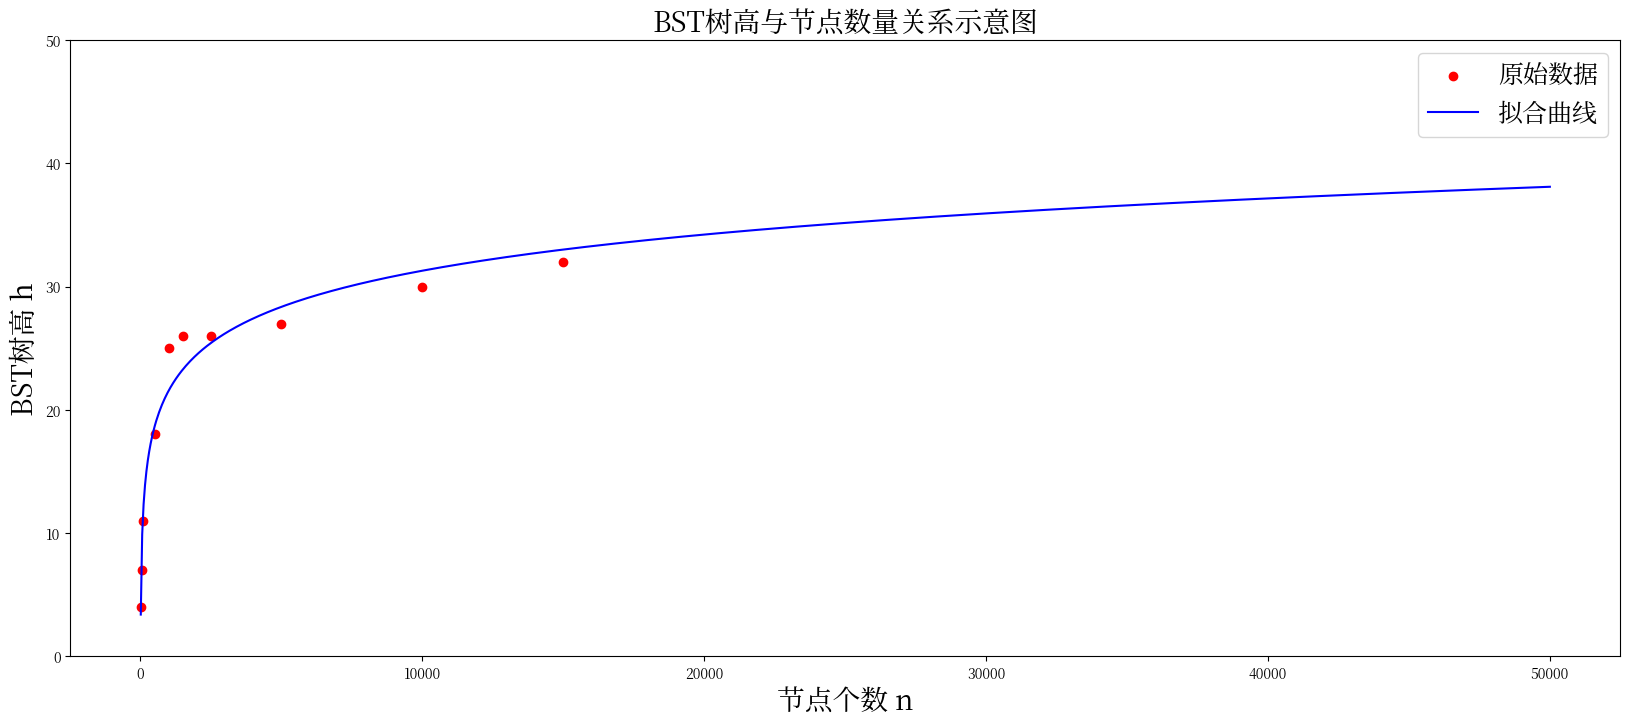

In [4]:
x_data = np.array([10,50,100,500,1000,1500,2500,5000,10000,15000])
y_data = np.array([4,7,11,18,25,26,26,27,30,32])

def log_func(x,a,b,c,d):
        return a*np.log(np.maximum(b*x+c,1e-10))+d
params,covariance = curve_fit(log_func,x_data,y_data,maxfev = 10000)

a,b,c,d = params
print(f"拟合得到的参数：a = {a}, b = {b}, c = {c}, d = {d}")
print("\n")
x_fit = np.linspace(min(x_data),50000,1000)
y_fit = log_func(x_fit,*params)

plt.figure(figsize=(20,8),dpi = 100)
plt.scatter(x_data,y_data,label = "原始数据",color = 'red')
plt.plot(x_fit,y_fit,label = "拟合曲线",color = 'blue')
plt.title("BST树高与节点数量关系示意图",fontsize=20)
plt.xlabel("节点个数 n",fontsize = 20)
plt.ylabel("BST树高 h",fontsize = 20)
plt.ylim(0,50)
plt.legend(fontsize = 18)
plt.show()

### 3 创建不同维度的数组

In [21]:
a = np.array([[[1,2,3,],[4,5,6]],[[1,2,3,],[4,5,6]]],dtype=np.float32)
a.shape

(2, 2, 3)

In [22]:
a

array([[[1., 2., 3.],
        [4., 5., 6.]],

       [[1., 2., 3.],
        [4., 5., 6.]]], dtype=float32)

In [30]:
s = np.array(["hi" , "I", "you"],dtype = np.bytes_)

In [31]:
s.dtype

dtype('S3')

### 4 生成固定数组

In [3]:
ones = np.ones([4,8])
ones

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [5]:
zeros = np.zeros_like(ones)
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
# 浅拷贝
onescopy = np.asarray(ones)
ones[0][0] = 100
onescopy

array([[100.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.]])

In [13]:
np.linspace(0,100,11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [15]:
np.arange(10,100,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [17]:
np.logspace(0,2,3)  #生成10的次幂

array([  1.,  10., 100.])

### 5 生成随机数组

In [19]:
np.random.rand(2,3) # rand() -- (0,1)之间均匀分布的随机数

array([[0.02477315, 0.39196641, 0.15926971],
       [0.68886175, 0.81343564, 0.15692007]])

In [21]:
np.random.uniform(low =1 , high =10,size = (3,5)) # unifrom() (low,high]之间size个均匀分布的随机数

array([[9.66503613, 9.4824183 , 3.44273397, 5.17183483, 6.96022627],
       [4.59557976, 1.58683103, 8.89254107, 6.24226361, 7.88773892],
       [8.67377755, 2.89981394, 2.02213578, 4.85450328, 1.30215492]])

In [22]:
np.random.randint(1,20,(3,5)) # randint() [low,high)之间size个均匀分布的随机数

array([[ 8, 13, 17, 13,  3],
       [11, 19, 10, 16, 19],
       [12,  3, 15, 11, 18]])

In [29]:
x1 = np.random.uniform(-1,1,100000000)
plt.figure(figsize = (20,8),dpi = 1000)
plt.hist(x=x1,bins = 1000) # x1 代表要使用的数据,bins代表要划分区间数
plt.show()

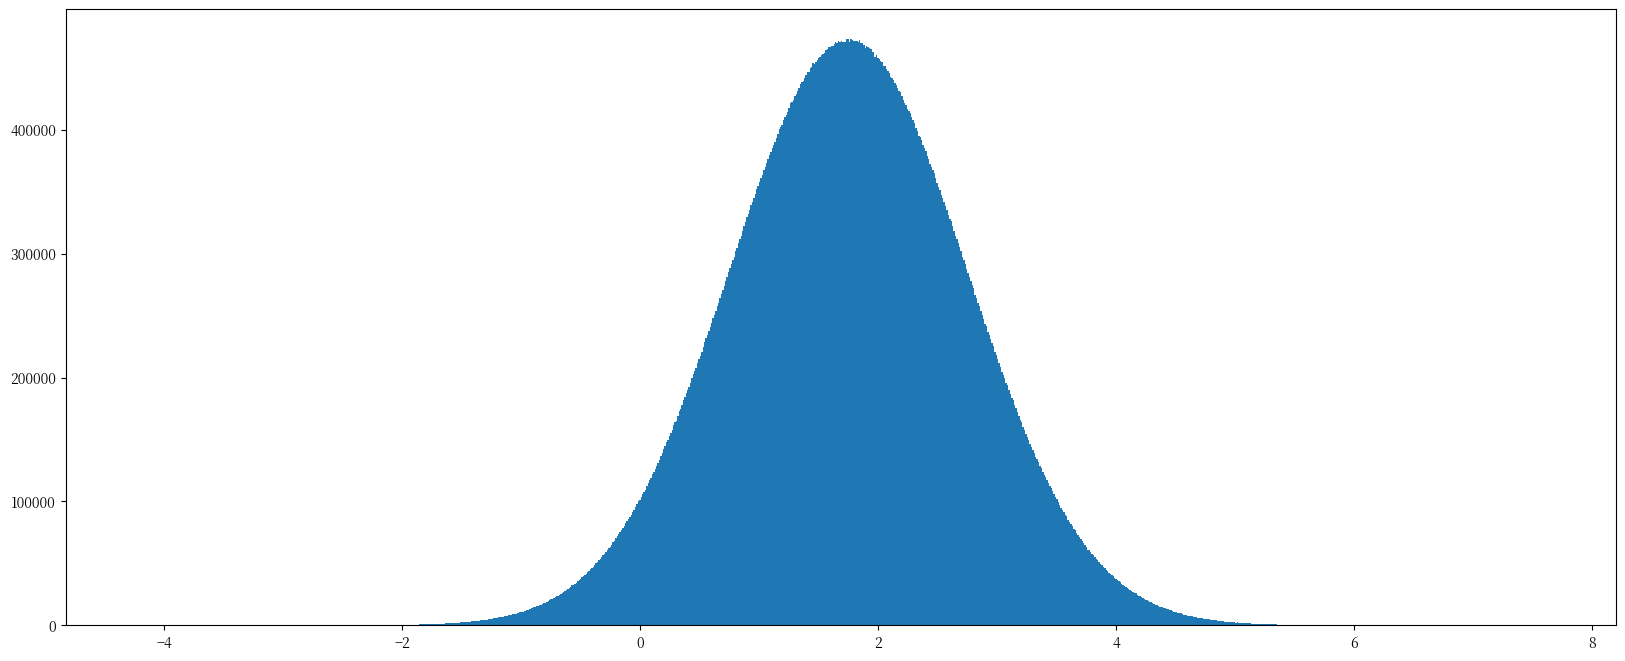

In [30]:
x2 = np.random.normal(1.75,1,100000000)
plt.figure(figsize=(20,8),dpi =100)
plt.hist(x2,bins=1000)
plt.show()

### 6 数组的索引,切片

In [9]:
stock_change = np.random.uniform(0,1,(4,5)) # 生成均值为0,标准差为1的4x5的股票数据

array([[0.32533938, 0.57541348, 0.75898646, 0.15699114, 0.66826863,
        0.40595825, 0.55602347, 0.03484174, 0.35803146, 0.61949282,
        0.42517435, 0.89136103, 0.58914298, 0.78851914, 0.32302579,
        0.2664291 , 0.11282691, 0.9075958 , 0.04656899, 0.86948252]])

In [11]:
stock_change[0:2,0:3] # 返回对应范围内的数据[左闭右开)
stock_change

array([[0.32533938, 0.57541348, 0.75898646, 0.15699114, 0.66826863],
       [0.40595825, 0.55602347, 0.03484174, 0.35803146, 0.61949282],
       [0.42517435, 0.89136103, 0.58914298, 0.78851914, 0.32302579],
       [0.2664291 , 0.11282691, 0.9075958 , 0.04656899, 0.86948252]])

In [3]:
a1 = np.array([[[1,2,3,4],[2,3,4,5]],[[1,2,3,4],[2,3,4,5]]])
a1

array([[[1, 2, 3, 4],
        [2, 3, 4, 5]],

       [[1, 2, 3, 4],
        [2, 3, 4, 5]]])

In [12]:
stock_change.reshape([-1,20]) # -1 为待确定大小, 如果无法整除20会报错

array([[0.32533938, 0.57541348, 0.75898646, 0.15699114, 0.66826863,
        0.40595825, 0.55602347, 0.03484174, 0.35803146, 0.61949282,
        0.42517435, 0.89136103, 0.58914298, 0.78851914, 0.32302579,
        0.2664291 , 0.11282691, 0.9075958 , 0.04656899, 0.86948252]])

In [58]:
stock_change.resize([5,4])  # 对stock_change
stock_change

array([[0.        , 0.        , 0.        , 0.15699114],
       [0.        , 0.        , 0.        , 0.03484174],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.2664291 ],
       [0.11282691, 0.        , 0.04656899, 0.        ]])

In [15]:
stock_change.T #  返回一个经过转置的数组

array([[0.32533938, 0.66826863, 0.35803146, 0.58914298, 0.11282691],
       [0.57541348, 0.40595825, 0.61949282, 0.78851914, 0.9075958 ],
       [0.75898646, 0.55602347, 0.42517435, 0.32302579, 0.04656899],
       [0.15699114, 0.03484174, 0.89136103, 0.2664291 , 0.86948252]])

### 7 类型修改

In [19]:
stock_change.astype(np.int32) # 返回一个新的数组

array([[0.32533938, 0.57541348, 0.75898646, 0.15699114],
       [0.66826863, 0.40595825, 0.55602347, 0.03484174],
       [0.35803146, 0.61949282, 0.42517435, 0.89136103],
       [0.58914298, 0.78851914, 0.32302579, 0.2664291 ],
       [0.11282691, 0.9075958 , 0.04656899, 0.86948252]])

In [23]:
stock_change.tobytes()

b"\xa8\x98sB\\\xd2\xd4?\x03\x1eL\x88\xc9i\xe2?\xc6\x96\x18\xfb\x9dI\xe8?\x9cu\xf6&I\x18\xc4?\x8a\xde\x9c\xe6tb\xe5?\xba2\x89L8\xfb\xd9?\xcc\xa9~\xbc\xf1\xca\xe1?@\xf1G\xe4\xc6\xd6\xa1?.\xe2\xb9\xcc\xfc\xe9\xd6?\xf9\xbf\x1f\x9b\xe2\xd2\xe3?\x86%\xd9x\x0e6\xdb?\x90\x80\xfb\x90\x07\x86\xec?*\xe2,cB\xda\xe2?\xb8!\x81\x7f\x8c;\xe9?\\5\xae^t\xac\xd4?\x02\xd3\x0b\xa6,\r\xd1?\x18\xf5\x10t9\xe2\xbc?\x87\xe1cW\x06\x0b\xed?0U'\r\xe4\xd7\xa7?0By\xff\xcc\xd2\xeb?"

### 8 数组去重

In [28]:
arr = ([2,3,4,54,5,5,5,6,6,7])
np.unique(arr)

array([ 2,  3,  4,  5,  6,  7, 54])

### 9 ndarray运算

In [59]:
stock_change > 0.01

array([[False, False, False,  True],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [ True, False,  True, False]])

In [60]:
stock_change[stock_change>0.01] =1
stock_change

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 1., 0.]])

In [61]:
#  python列表中不能进行逐个元素比较运算

In [63]:
np.all(stock_change>0)

np.False_

In [65]:
np.any(stock_change>0)

np.True_

In [67]:
np.where(stock_change < 1,1,0)

array([[1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 1]])

In [69]:
np.where(np.logical_and(stock_change>0,stock_change<1),1,0)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [70]:
np.where(np.logical_or(stock_change>0,stock_change<1),1,0)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

### 10 统计指标

In [75]:
stock_c = np.random.uniform(2,1,(4,5))
stock_c

array([[1.13168563, 1.44900228, 1.82556754, 1.82837722, 1.61712782],
       [1.91726832, 1.19679289, 1.1559591 , 1.10220751, 1.75107779],
       [1.42950669, 1.54802869, 1.05076916, 1.97489591, 1.77040962],
       [1.23228554, 1.14248528, 1.27185306, 1.06806796, 1.7386637 ]])

In [77]:
stock_c.max() # 全局最大值

np.float64(1.97489591432407)

In [80]:
stock_c.max(axis = 0) # axis =0 ,每列最大值

array([1.91726832, 1.54802869, 1.82556754, 1.97489591, 1.77040962])

In [81]:
np.argmax(stock_c)

np.int64(13)